In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'C:\Users\Aditya\OneDrive - Manipal Academy of Higher Education\Desktop\SP\Manas\Datasets\weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [6]:
#df = df.replace({'RainToday': {'Yes': 1,'No': 0}}) 
                                
#df = df.replace({'RainTomorrow': {'Yes': 1,'No': 0}}) 
#df.dropna(subset = ['RainToday'])
#df.drop(df.index[df['RainToday'] == 12.19403438096892])




In [7]:
df = df.fillna(value=df['MinTemp'].mean())
df = df.fillna(value=df['MaxTemp'].mean())
df = df.fillna(value=df['Rainfall'].mean())
df = df.fillna(value=df['Evaporation'].mean())
df = df.fillna(value=df['Sunshine'].mean())
df = df.fillna(value=df['WindGustSpeed'].mean())
df = df.fillna(value=df['WindSpeed9am'].mean())
df = df.fillna(value=df['WindSpeed3pm'].mean())
df = df.fillna(value=df['Humidity9am'].mean())
df = df.fillna(value=df['Humidity3pm'].mean())
df = df.fillna(value=df['Pressure9am'].mean())
df = df.fillna(value=df['Pressure3pm'].mean())
df = df.fillna(value=df['Cloud9am'].mean())
df = df.fillna(value=df['Cloud3pm'].mean())
df = df.fillna(value=df['Temp9am'].mean())
df = df.fillna(value=df['Temp3pm'].mean())

In [8]:
df.drop('Date', inplace=True, axis=1)
df.drop('Location', inplace=True, axis=1)
df.drop('WindGustDir', inplace=True, axis=1)
df.drop('WindDir9am', inplace=True, axis=1)
df.drop('WindDir3pm', inplace=True, axis=1)

In [9]:
df= df.replace(to_replace ="Yes",value =1)
df =df.replace(to_replace ="No",value =0)

In [10]:
df.drop(df[df['RainToday'] == 12.19403438096892].index, inplace = True)
df.drop(df[df['RainTomorrow'] == 12.19403438096892].index, inplace = True)

In [11]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,12.194034,12.194034,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,12.194034,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,12.194034,12.194034,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,12.194034,12.194034,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,12.194034,12.194034,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,12.194034,2.000000,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,12.194034,12.194034,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,12.194034,12.194034,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,12.194034,12.194034,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [12]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]
Y= df['RainTomorrow']

In [15]:
df.RainToday.unique()

array([0., 1.])

In [16]:
dups = df.pivot_table(index = ['RainToday'], aggfunc ='size')

In [17]:
dups

RainToday
0.0    109332
1.0     31455
dtype: int64

In [18]:
#normalising the data
for i in X.columns:
    X = X - X.mean(axis=0)
    X[i] = X[i]/np.max(np.abs(X[i]))
    
#data splitting
df = df.sample(frac=1)
indices = range(df.shape[0])
train_size = int(0.8 * df.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]


Xtrain, Xtest = X.iloc[train_indices], X.iloc[test_indices]
Ytrain, Ytest = Y.iloc[train_indices], Y.iloc[test_indices]


In [22]:
Xtrain = Xtrain.T
Xtest = Xtest.T

#Ytrain = Ytrain.values.reshape(1, Xtrain.shape[1])
#Ytest = Ytest.values.reshape(1, Xtest.shape[1])
print(Xtrain.shape[1])
print(Xtrain.shape)

17
(112629, 17)


In [48]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def model(X, Y, learning_rate, iterations):
    
    m = Xtrain.shape[1]
    n = Xtrain.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [22]:
iterations = 10000
learning_rate = 0.01
W, B, cost_list = model(Xtrain, Ytrain, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  1000 iteration is :  0.46648158837805076
cost after  2000 iteration is :  0.4390397623171691
cost after  3000 iteration is :  0.4282450114948738
cost after  4000 iteration is :  0.422434538994828
cost after  5000 iteration is :  0.4187592249252793
cost after  6000 iteration is :  0.41621052173560713
cost after  7000 iteration is :  0.41433817570280984
cost after  8000 iteration is :  0.4129055382039697
cost after  9000 iteration is :  0.4117741722712963


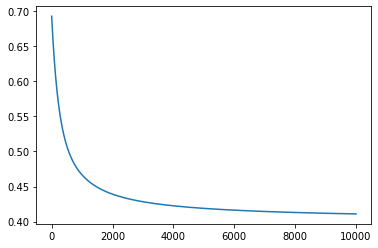

In [23]:
plt.plot(np.arange(iterations), cost_list)

In [46]:
def accuracy(X, Y, W, B):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        A = A > 0.5
        A = np.array(A, dtype = 'int64')
        acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
        print(round(acc, 2), "%")

In [47]:
accuracy(Xtest, Ytest, W, B)

84.64 %
